In [1]:
import numpy as np                              
from numpy.linalg import inv                   
import matplotlib.pyplot as plt                 
from scipy.stats import multivariate_normal
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
%matplotlib inline

In [2]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = df.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal'], axis = 1)
X

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


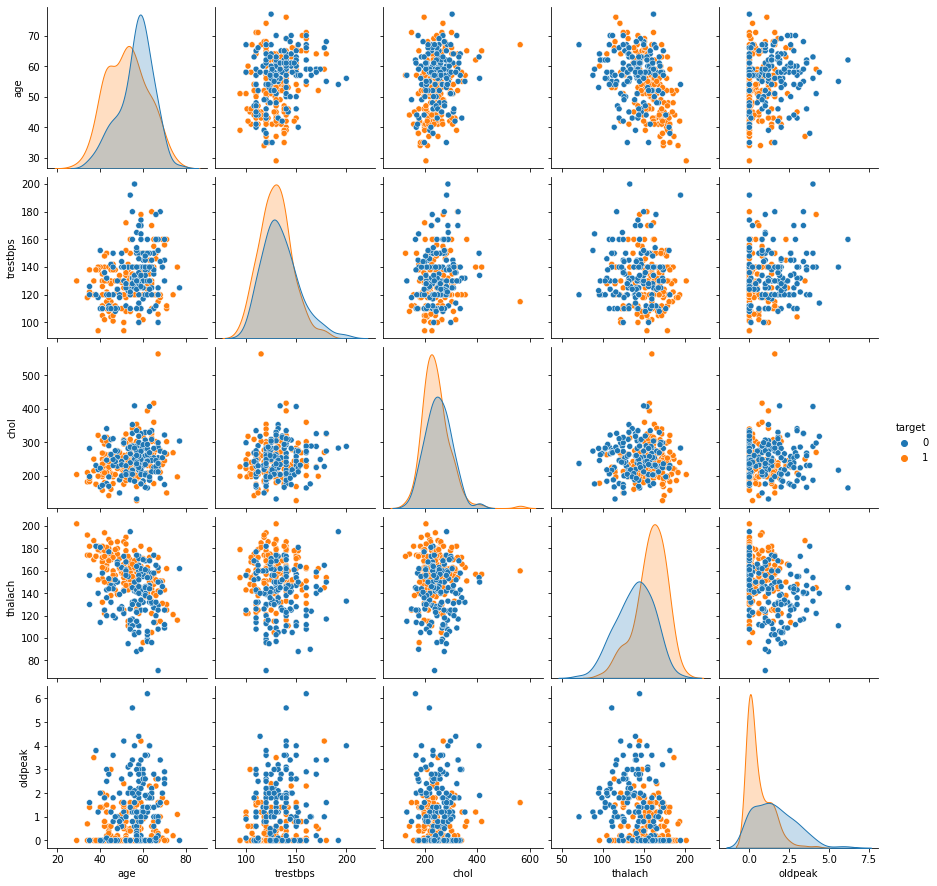

In [4]:
sns.pairplot(X, hue = 'target')
plt.show()

In [5]:
X = X.drop(['target'], axis = 1)
X

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


For n_components = 2 The average silhouette_score is : 0.387852518996175
For n_components = 3 The average silhouette_score is : 0.2780829156926629
For n_components = 4 The average silhouette_score is : 0.229666628718124
For n_components = 5 The average silhouette_score is : 0.21846751430332936


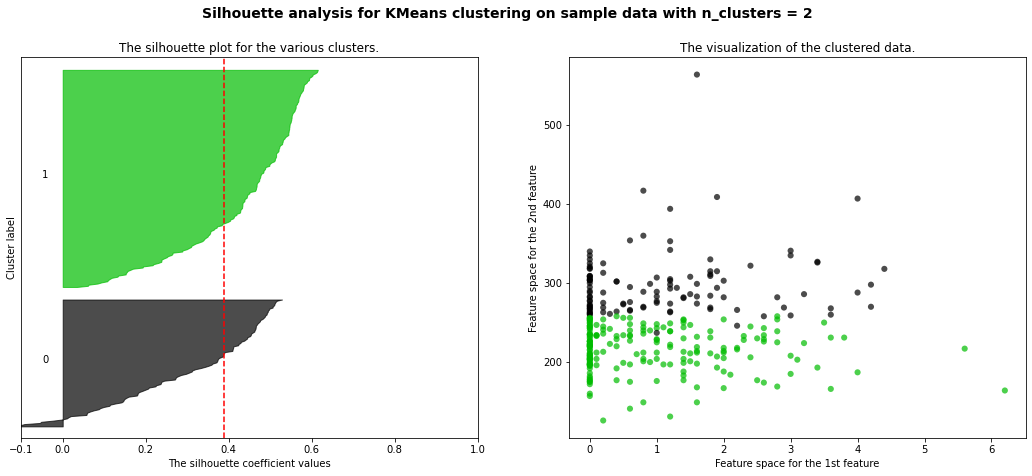

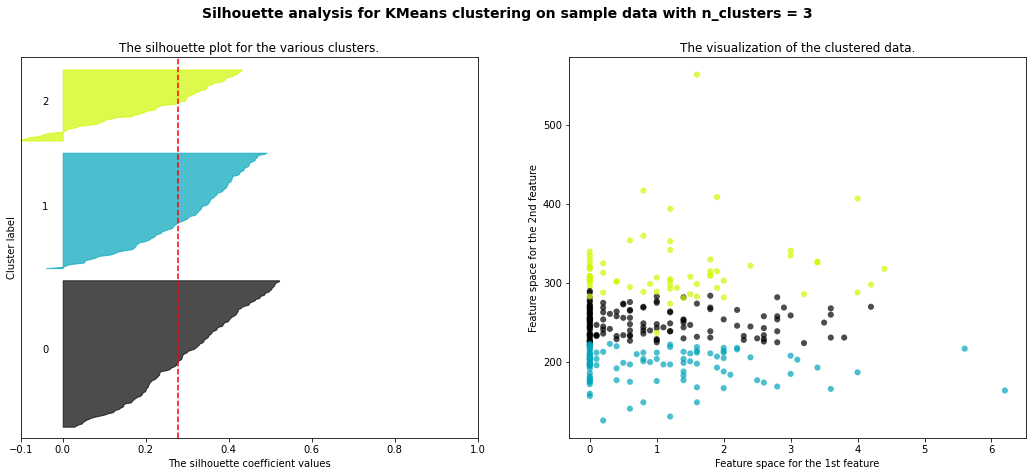

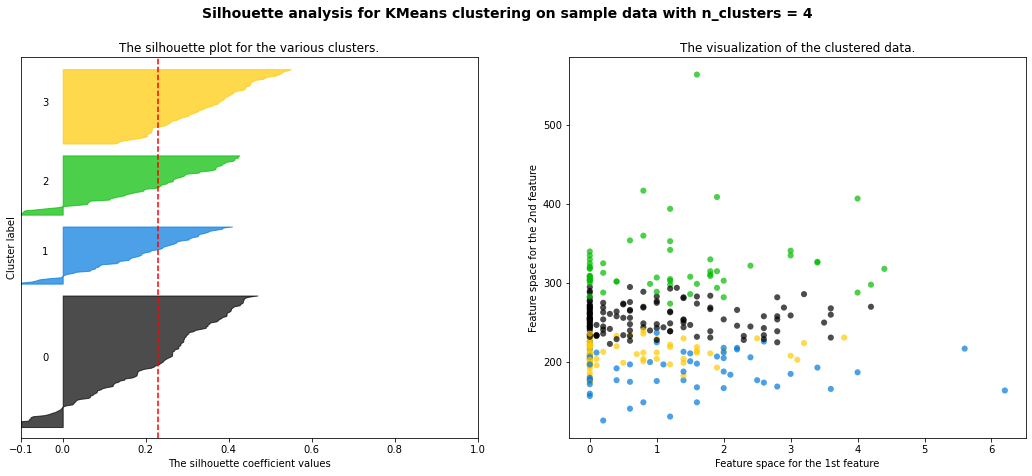

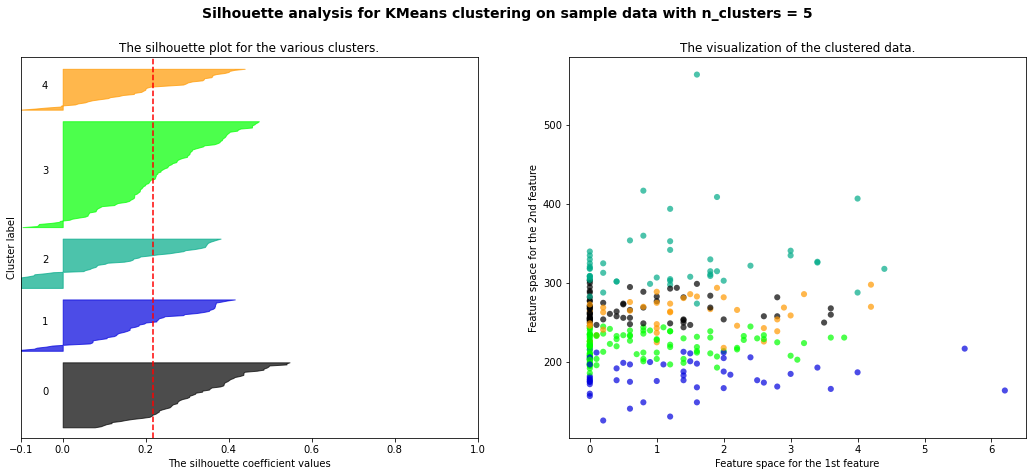

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )
    cluster_labels = gmm.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        X['oldpeak'], X['chol'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [7]:
#X = X.iloc[:, ::-1]

EM = mixture.GaussianMixture(
            n_components = 2, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        ).fit(X)

In [8]:
labels = EM.predict(X)
labels

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

Text(0, 0.5, 'Feature space for the 2nd feature')

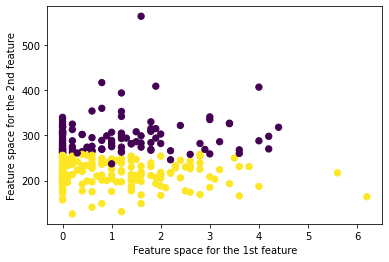

In [9]:
plt.scatter(X['oldpeak'], X['chol'], c=labels, s=40, cmap='viridis')
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

In [11]:
probs = gmm.predict_proba(X)
print(probs[:10].round(3))

[[0.033 0.006 0.    0.921 0.039]
 [0.586 0.    0.002 0.412 0.   ]
 [0.    0.029 0.    0.971 0.   ]
 [0.036 0.    0.    0.963 0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.769 0.    0.231 0.   ]
 [0.852 0.    0.127 0.    0.022]
 [0.99  0.    0.001 0.009 0.001]
 [0.    0.636 0.    0.364 0.   ]
 [0.    0.992 0.    0.008 0.   ]]


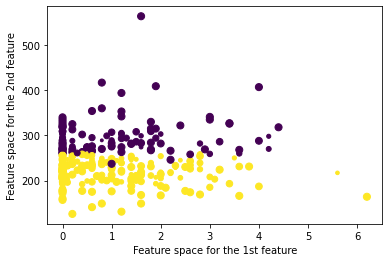

In [13]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.scatter(X['oldpeak'], X['chol'], c=labels, cmap='viridis', s=size)

In [14]:
X['labels'] = labels
X

,age,trestbps,chol,thalach,oldpeak,labels
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,1
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,1
301,57,130,131,115,1.2,1


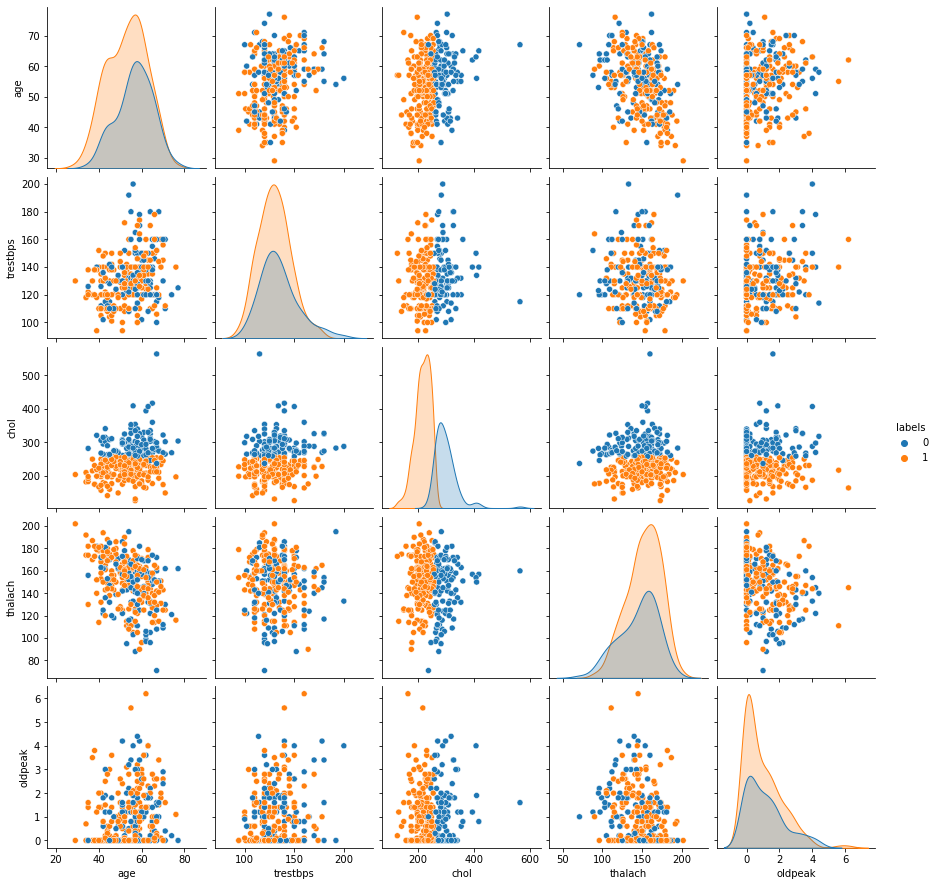

In [15]:
sns.pairplot(X, hue = 'labels')
plt.show()

In [50]:
Samples = EM.sample(n_samples =303)

In [70]:
Samples[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [52]:
X_new = pd.DataFrame()
X_new

""


In [53]:
X_new['labels'] = Samples[1]

In [54]:
Samples[0].shape

(303, 5)

In [55]:
X_new['f1'], X_new['f2'], X_new['f3'], X_new['f4'], X_new['f5'] = Samples[0].T

In [56]:
X_new

,labels,f1,f2,f3,f4,f5
0,0,33.155662,151.305013,286.412423,107.947122,-14.188914
1,0,70.838985,142.765065,269.179425,160.017673,-0.960746
2,0,66.738498,142.765139,268.958697,153.691620,-13.224204
3,0,93.253144,152.007948,297.388721,122.164726,2.405137
4,0,60.471366,106.341078,348.844273,154.714907,41.115122
...,...,...,...,...,...,...
298,1,79.890062,113.118383,184.622779,127.674939,-17.227582
299,1,47.291293,159.127241,193.323999,164.129398,-16.334696
300,1,76.185157,139.019694,247.972434,146.852347,14.379329
301,1,67.643049,121.456109,213.653730,140.397261,-13.583210


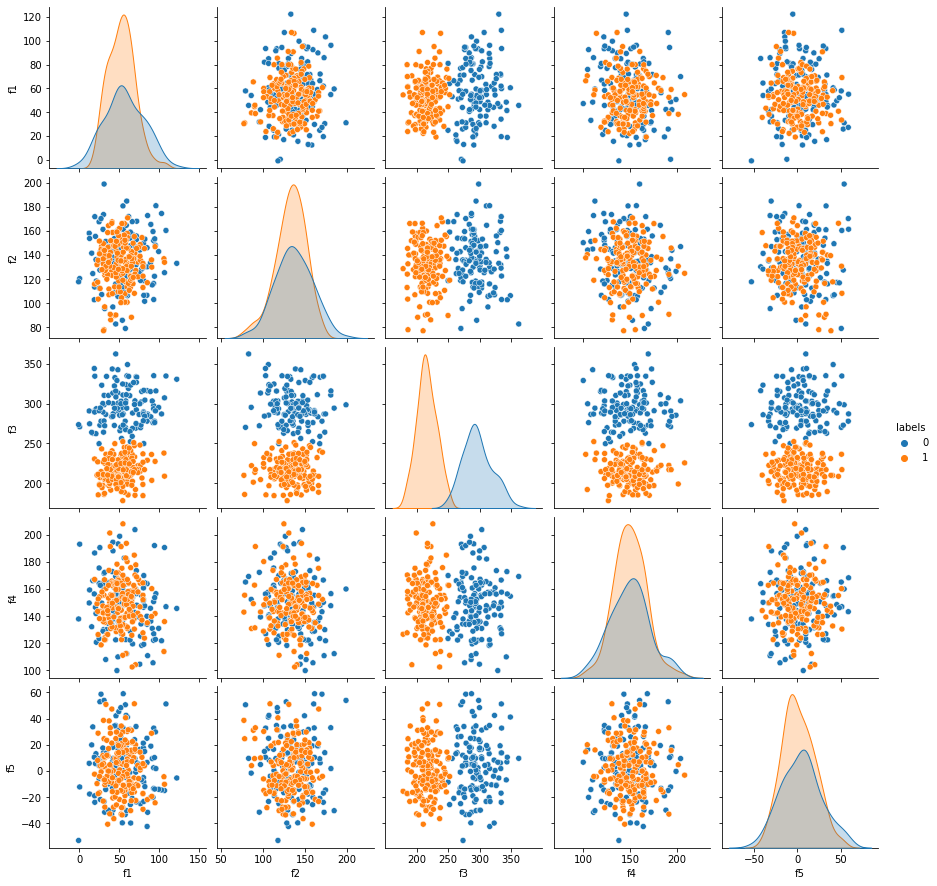

In [61]:
sns.pairplot(X_new, hue = 'labels')
plt.show()

In [49]:
EM.converged_

True

In [71]:
X['f1'] = X_new['f1']
X['f2'] = X_new['f2']
X['f3'] = X_new['f3']
X['f4'] = X_new['f4']
X['f5'] = X_new['f5']
X = X.drop(['labels'], axis = 1)
X

,age,trestbps,chol,thalach,oldpeak,f1,f2,f3,f4,f5
0,63,145,233,150,2.3,33.155662,151.305013,286.412423,107.947122,-14.188914
1,37,130,250,187,3.5,70.838985,142.765065,269.179425,160.017673,-0.960746
2,41,130,204,172,1.4,66.738498,142.765139,268.958697,153.691620,-13.224204
3,56,120,236,178,0.8,93.253144,152.007948,297.388721,122.164726,2.405137
4,57,120,354,163,0.6,60.471366,106.341078,348.844273,154.714907,41.115122
...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,79.890062,113.118383,184.622779,127.674939,-17.227582
299,45,110,264,132,1.2,47.291293,159.127241,193.323999,164.129398,-16.334696
300,68,144,193,141,3.4,76.185157,139.019694,247.972434,146.852347,14.379329
301,57,130,131,115,1.2,67.643049,121.456109,213.653730,140.397261,-13.583210


In [72]:
X['labels'] = Samples[1]
X

,age,trestbps,chol,thalach,oldpeak,f1,f2,f3,f4,f5,labels
0,63,145,233,150,2.3,33.155662,151.305013,286.412423,107.947122,-14.188914,0
1,37,130,250,187,3.5,70.838985,142.765065,269.179425,160.017673,-0.960746,0
2,41,130,204,172,1.4,66.738498,142.765139,268.958697,153.691620,-13.224204,0
3,56,120,236,178,0.8,93.253144,152.007948,297.388721,122.164726,2.405137,0
4,57,120,354,163,0.6,60.471366,106.341078,348.844273,154.714907,41.115122,0
...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,79.890062,113.118383,184.622779,127.674939,-17.227582,1
299,45,110,264,132,1.2,47.291293,159.127241,193.323999,164.129398,-16.334696,1
300,68,144,193,141,3.4,76.185157,139.019694,247.972434,146.852347,14.379329,1
301,57,130,131,115,1.2,67.643049,121.456109,213.653730,140.397261,-13.583210,1


In [62]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [73]:
y = X['labels']
Z = X.drop(columns=['labels'])

print(Z.shape)
print(y.shape)

(303, 10)
(303,)


In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 11)
(91, 11)


In [75]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.6902 - accuracy: 0.5325 - val_loss: 0.6736 - val_accuracy: 0.5814
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5621 - val_loss: 0.6238 - val_accuracy: 0.6279
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.7041 - val_loss: 0.6052 - val_accuracy: 0.6279
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.6746 - val_loss: 0.5255 - val_accuracy: 0.9070
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7278 - val_loss: 0.4757 - val_accuracy: 0.9070
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7929 - val_loss: 0.4408 - val_accuracy: 0.9070
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7988 - val_loss: 0.4082 - val_accuracy: 0.9302
Epoch 8/100
1

In [77]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.13928435742855072, 0.9560439586639404]

In [78]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.9560439586639404
Test loss: 0.13928435742855072


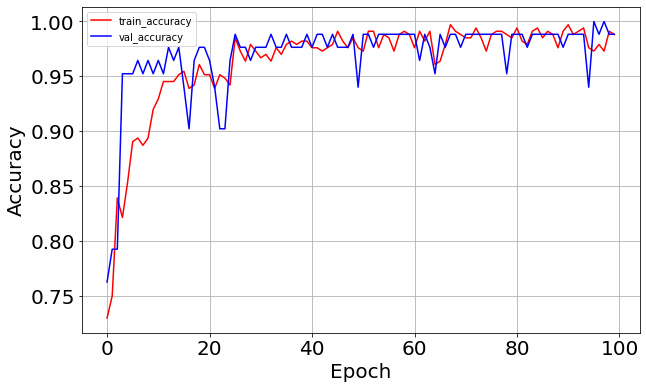

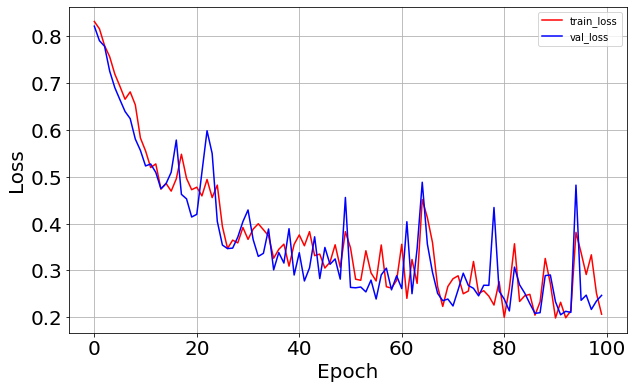

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

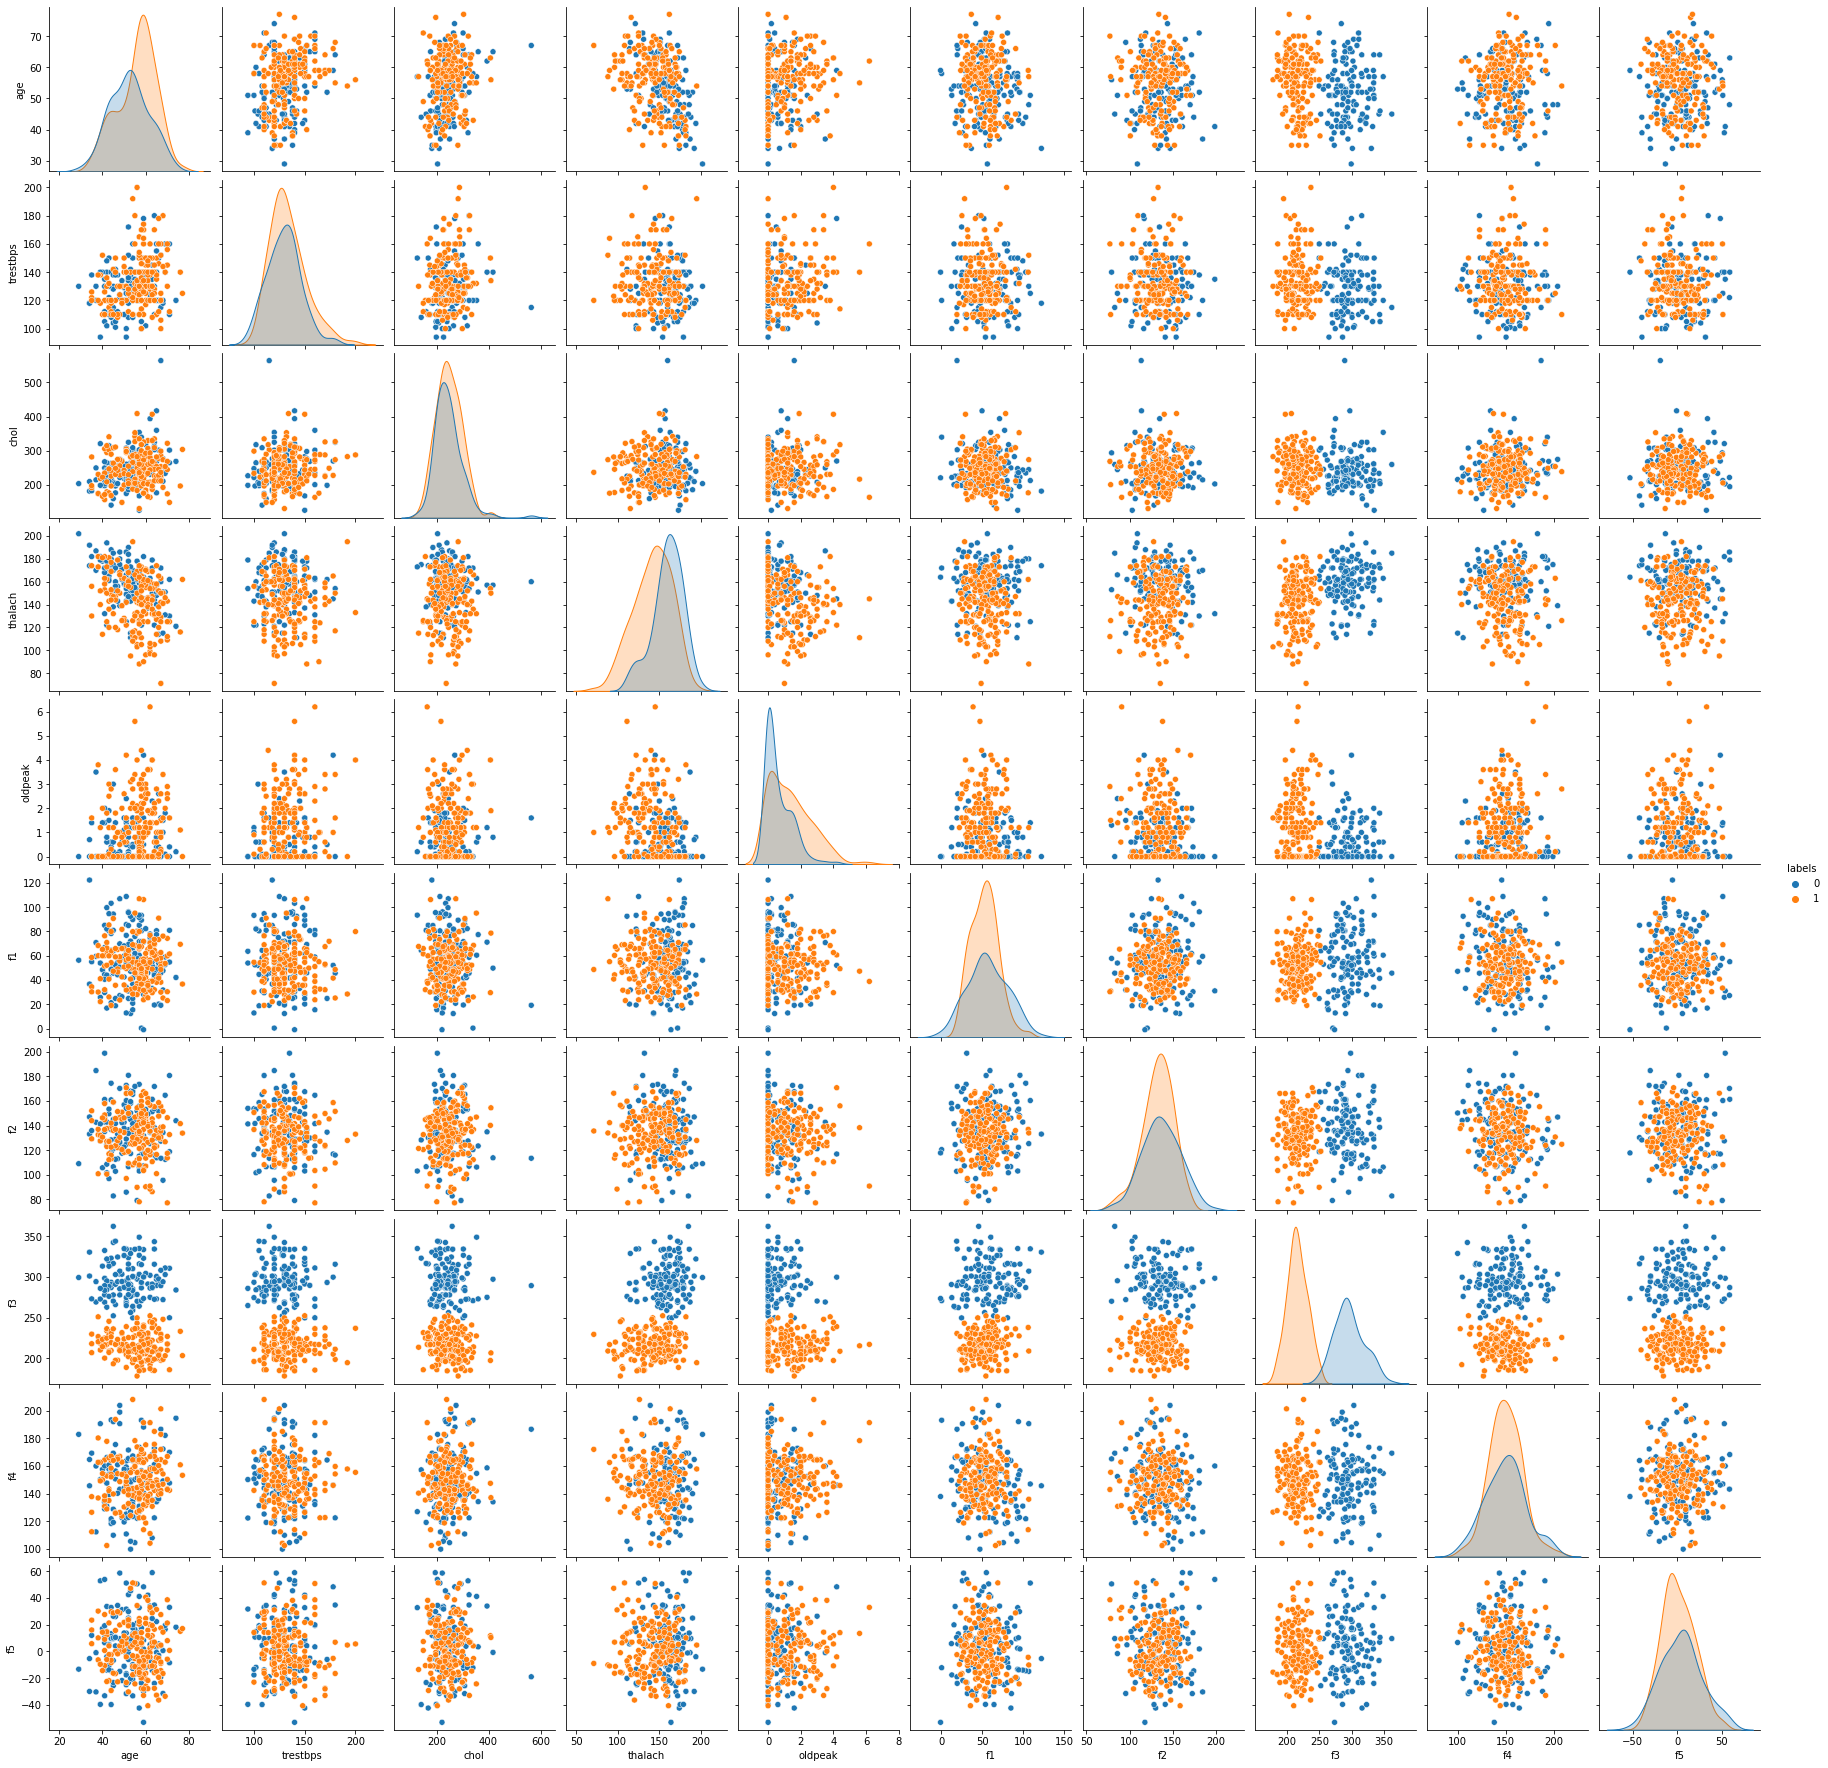

In [80]:
sns.pairplot(X, hue = 'labels')
plt.show()